In [1]:
import matplotlib.pyplot as plt
import numpy as np

file = open('muon_lifetime_20240207.Spe', 'r+')

data = []

for line in file:
    if line[0] == " ":
        string = line
        string.strip()
        data.append(int(string))

file.close()

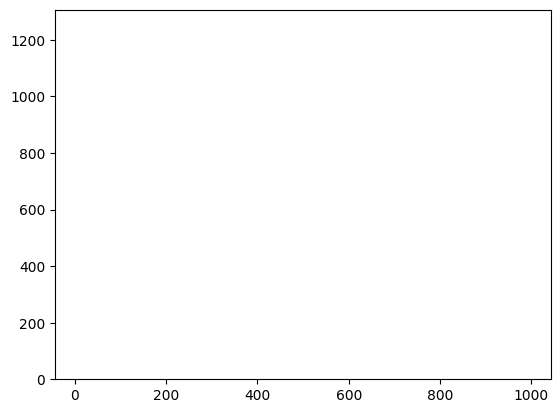

In [2]:
x = range(1,len(data)+1)

time = []

for i in range(len(data)):
    for j in range(data[i]):
        time.append(x[i])


y,ax,_ = plt.hist(time,20,visible=False)
ax = ax[1:]

offset = abs(ax[0] - ax[1]) / 2
ax -= offset

In [3]:
file_ax = open("ax.txt", "w+")
for value in ax:
    print(value, end=" ", file=file_ax)
file_ax.close()

file_y = open("y.txt", "w+")
for value in y:
    print(value, end=" ", file=file_y)
file_y.close()

Fit found using matlab toolbox

fit found using the form $f(x)=a*e^{(b*x)}$

Coefficients (with 95% confidence bounds):

    $a = 1692$ $(1589, 1670)$
    
    $b = -0.009245$ $(-0.009545, -0.008945)$
    
    Goodness of fit:
        SSE: 2519
        R-square: 0.9987
        Adjusted R-square: 0.9986
        RMSE: 11.83

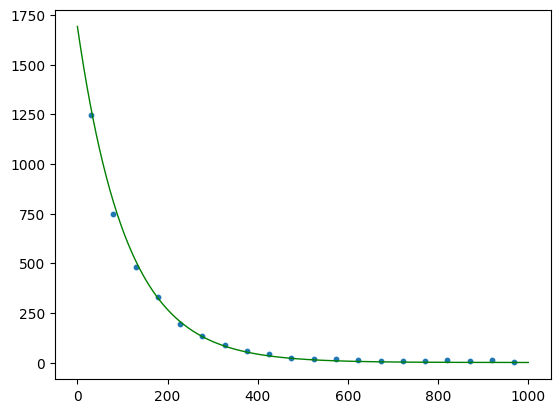

In [12]:
def fit(x):
    return 1692 * (np.e ** (-0.009245 * x))

fit_x = np.linspace(0,1000,1000)
fit_y = fit(fit_x)

plt.plot(fit_x, fit_y,c="green",lw=1)
plt.scatter(ax,y,s=10)